In [7]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

CARGAR LA IMAGEN

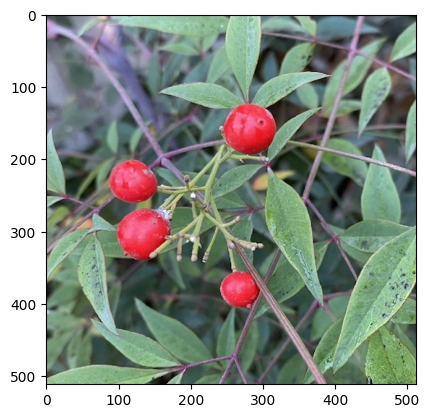

In [9]:
imagen = cv.imread('imagenes/frutos_rojos.png')
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB); #Cambio de formato
plt.imshow(imagen)

CARGAR CANALES RGB

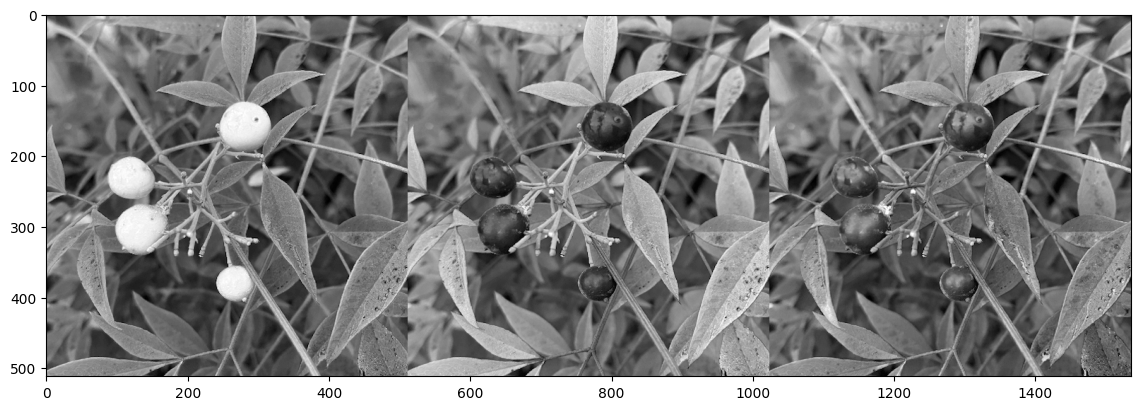

In [10]:
R = imagen[:,:,0]
G = imagen[:,:,1]
B = imagen[:,:,2]
CANAL_RGB = np.concatenate((R,G,B), axis=1)
plt.figure(figsize=(14, 8))  # Ancho: 10 pulgadas, Alto: 5 pulgadas
plt.imshow(CANAL_RGB, 'gray')

CARGAR IMAGEN BINARIOS POR CANALES

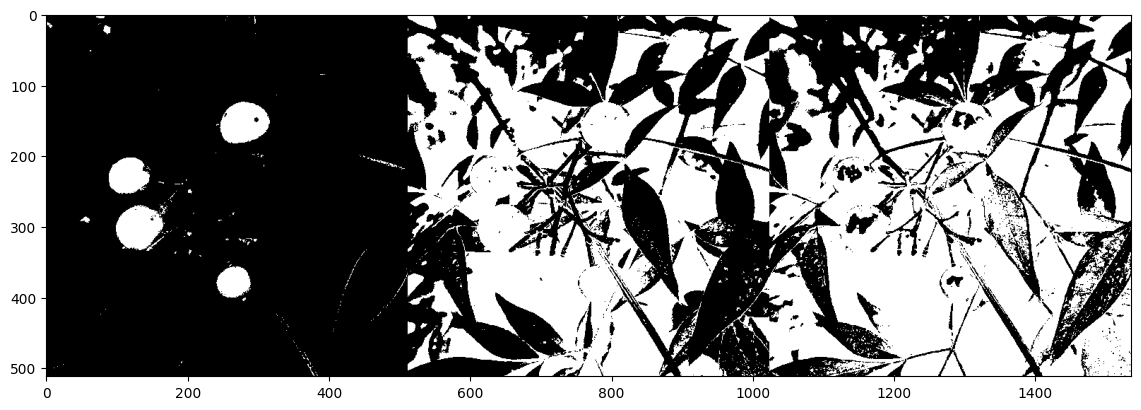

In [86]:
Sr = R > 210
Sg = G < 130
Sb = B < 130

Srgb = np.concatenate((Sr,Sg,Sb), axis = 1)
plt.figure(figsize=(14, 8))
plt.imshow(Srgb, "gray")

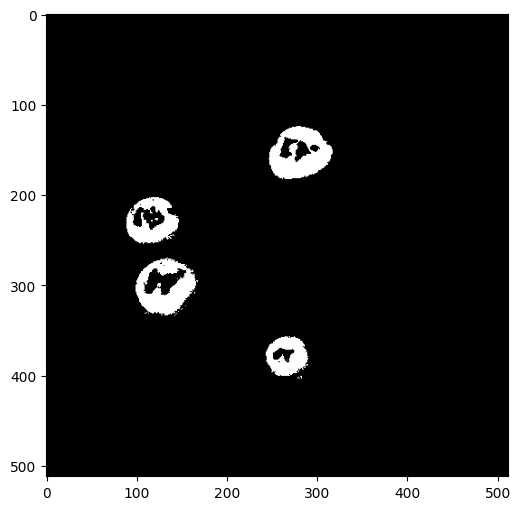

In [87]:
OPERACION_AND = Sr & Sg & Sb
OPERACION_AND_ = OPERACION_AND.astype(np.uint8)
plt.figure(figsize=(12, 6))

plt.imshow(OPERACION_AND_, "gray")

RELLENAR IMAGEN

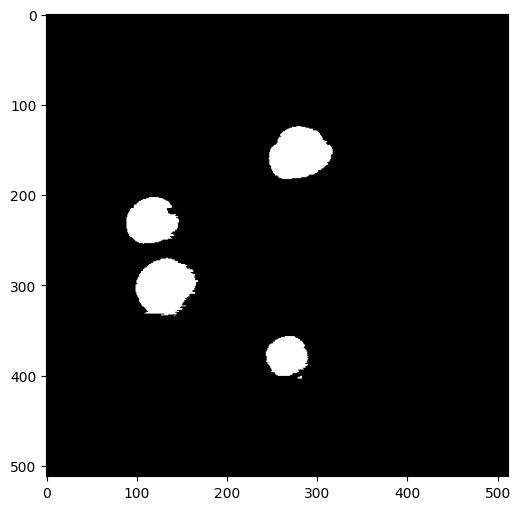

In [88]:
a,b = OPERACION_AND_.shape
for i in range(a):
    izq = 0
    der = 0
    for j in range(b):
        if OPERACION_AND_[i,j] == 1:
            izq = j
            break
    for j in range(-1, -b-1, -1):
        if OPERACION_AND_[i,j] == 1:
            der = b + j
            break
    OPERACION_AND_[i,izq:der] = 1
        
plt.figure(figsize=(12, 6))
plt.imshow(OPERACION_AND_, "gray")

In [39]:
print(OPERACION_AND_)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


DETECTAR BORDES

(512, 512)


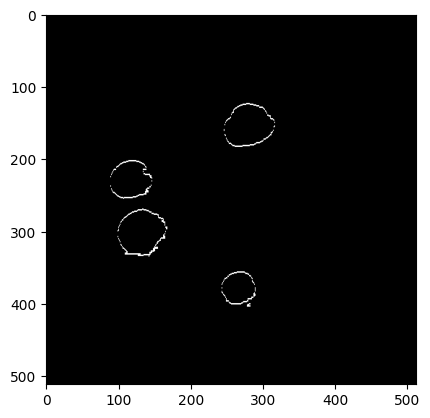

In [89]:
print(OPERACION_AND_.shape)
a, b = OPERACION_AND_.shape
imagen_borde = np.zeros((a,b), dtype = np.uint8)
for i in range(a):
    for j in range(b):
        if(i < b - 1):
            if(OPERACION_AND_[i,j] != OPERACION_AND_[i+1,j]):
                imagen_borde[i,j] = 1
                imagen_borde[i + 1, j] = 1

plt.imshow(imagen_borde, 'gray')

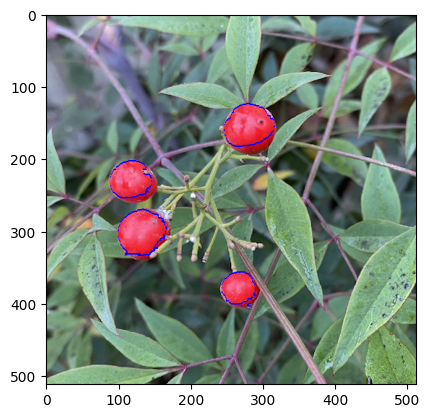

In [90]:
N, M, b = imagen.shape
imagen_new = imagen
for i in range(N):
    for j in range(M):
        if (imagen_borde[i,j] == 1):
            imagen_new[i,j,:] = [0,0,255]

plt.imshow(imagen_new)